In [1]:
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sns.set_style("whitegrid")

In [92]:
def euclidean(p,q):
    return np.sqrt(np.sum((p-q)**2))

In [93]:
def predict(X,k):
    pred_labels = [find_labels(x,k) for x in X]
    return (pred_labels)

In [94]:
def find_labels(x,k):
    distance = [euclidean(x,x_train) for x_train in X_Train]
    #print(distance)
    indices = np.argsort(distance)[:k]
    neighbour_labels = [Y_Train[i] for i in indices]
    most_common = Counter(neighbour_labels).most_common(1)
    #distance=[]
    return most_common[0][0]

In [265]:
def accuracy(k):
    pred_label = predict(X_Test,k)
    return(accuracy_score(pred_label,Y_Test))

In [496]:
data = pd.read_excel(r"C:\Users\Shivam\Desktop\ml_prg\dataset\iris.xlsx",header=None)
data.columns = ['A','B','C','D','Label']

In [497]:
data.head()

,A,B,C,D,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [498]:
replace = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
data.replace(replace,inplace=True)

In [499]:
X = data[['A','B','C','D']].values
Y = data['Label'].values

In [500]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.3,random_state=19)

In [251]:
#pred_labels = predict(X_Test,1)

In [280]:
accuracy_scores = [accuracy(k) for k in range(1,80)]

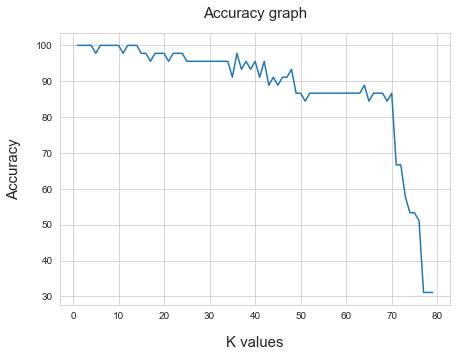

In [294]:
plt.figure(figsize=(7,5))
plt.plot(list(range(1,80)),np.multiply(accuracy_scores,100))
plt.xlabel("K values",fontsize=15,labelpad=15)
plt.ylabel("Accuracy",fontsize=15,labelpad=15)
plt.title("Accuracy graph",fontsize=15,pad=15)
plt.show()

In [252]:
accuracy_score(pred_labels,Y_Test)

0.9333333333333333

In [253]:
pred_labels_train = predict(X_Train,1)

In [254]:
accuracy_score(pred_labels_train,Y_Train)

1.0

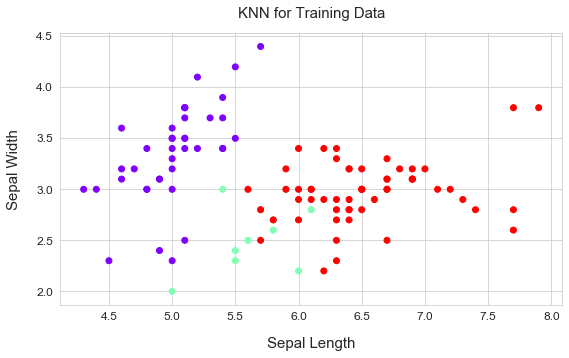

In [530]:
plt.figure(figsize=(9,5))
#plt.scatter(X_Train[:,0],X_Train[:,1],c=Y_Train,cmap="inferno")
plt.scatter(X_Train[:,0],X_Train[:,1],c=pred_labels_new_train,cmap="rainbow")
plt.xlabel("Sepal Length",fontsize=15,labelpad=15)
plt.ylabel("Sepal Width",fontsize=15,labelpad=15)
plt.title("KNN for Training Data",fontsize=15,pad=15)
plt.xticks(size=12)
plt.yticks(size=12)
#plt.legend(loc="lower right",fontsize=12)
plt.show()

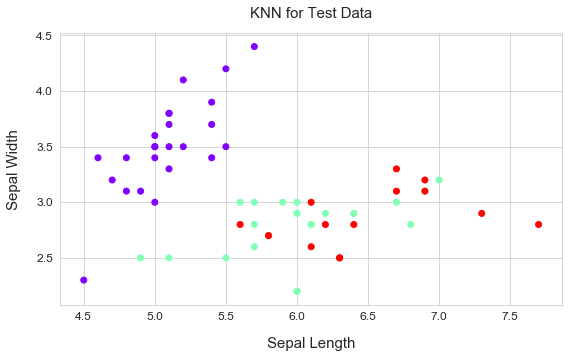

In [256]:
plt.figure(figsize=(9,5))
#plt.scatter(X_Train[:,0],X_Train[:,1],c=Y_Train,cmap="inferno")
plt.scatter(X_Test[:,0],X_Test[:,1],c=pred_labels,cmap="rainbow")
plt.xlabel("Sepal Length",fontsize=15,labelpad=15)
plt.ylabel("Sepal Width",fontsize=15,labelpad=15)
plt.title("KNN for Test Data",fontsize=15,pad=15)
plt.xticks(size=12)
plt.yticks(size=12)
#plt.legend(loc="lower right",fontsize=12)
plt.show()

#### Using sklearn

In [501]:
from sklearn.neighbors import KNeighborsClassifier

In [502]:
knn = KNeighborsClassifier(n_neighbors=1)

In [503]:
knn.fit(X_Train,Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [504]:
pred_labels_new = knn.predict(X_Test)

In [505]:
accuracy_score(pred_labels_new,Y_Test)

0.9333333333333333

In [506]:
pred_labels_new_train = knn.predict(X_Train)

In [507]:
accuracy_score(pred_labels_new_train,Y_Train)

1.0

In [508]:
acc_train = []
acc_test = []
error_train = []
error_test = []
error_rate = []
for i in range(1,80):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_Train,Y_Train)
    pred_labels_new = knn.predict(X_Test)
    acc_test.append(accuracy_score(pred_labels_new,Y_Test))
    error_test.append(np.size(np.where(pred_labels_new!=Y_Test))/len(X_Test))
    
    error_rate.append(np.mean(pred_labels_new!=Y_Test))
    
    pred_labels_new_train = knn.predict(X_Train)
    acc_train.append(accuracy_score(pred_labels_new_train,Y_Train))
    error_train.append(np.size(np.where(pred_labels_new_train!=Y_Train))/len(X_Train))

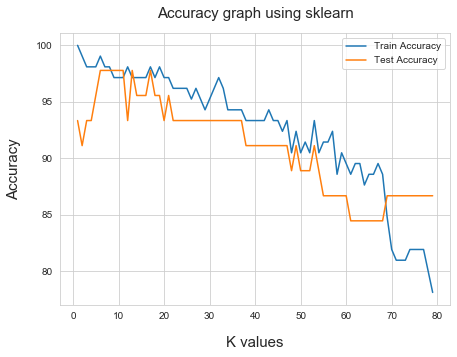

In [509]:
plt.figure(figsize=(7,5))
plt.plot(list(range(1,80)),np.multiply(acc_train,100),label='Train Accuracy')
plt.plot(list(range(1,80)),np.multiply(acc_test,100), label='Test Accuracy')

plt.xlabel("K values",fontsize=15,labelpad=15)
plt.ylabel("Accuracy",fontsize=15,labelpad=15)

plt.title("Accuracy graph using sklearn",fontsize=15,pad=15)
plt.legend()
plt.show()

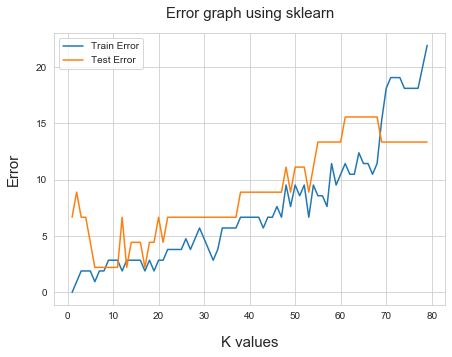

In [510]:
plt.figure(figsize=(7,5))
plt.plot(list(range(1,80)),np.multiply(error_train,100),label='Train Error')
plt.plot(list(range(1,80)),np.multiply(error_test,100),label='Test Error')

plt.xlabel("K values",fontsize=15,labelpad=15)
plt.ylabel("Error",fontsize=15,labelpad=15)

plt.title("Error graph using sklearn",fontsize=15,pad=15)
plt.legend()
plt.show()